# Exploring Warrington's Air Quality Data
---
## A3 Miscellaneous Charts
JWriggy

**data: © Crown 2020 copyright Defra via uk-air.defra.gov.uk, licenced under the [Open Government Licence (OGL)](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/2/)**

1. The pattern of high pollutant days
2. 2020 compared with recent years

NB 2020 data not yet valdiated

In [1]:
# for data handling
import pandas as pd
import numpy as np
import datetime as dt

# for plots
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.patches as mpatches


# Load taggregated data
no2dat = pd.read_csv('data/no2dat.csv', index_col=["date"],  parse_dates=True,)
pm25dat = pd.read_csv('data/pm25dat.csv', index_col=["date"],  parse_dates=True,)
o3dat = pd.read_csv('data/o3dat.csv', index_col=["date"],  parse_dates=True,)

In [2]:
# styling
plt.style.use('ww.mplstyle')
h1 = {'fontsize': 20, 'va': 'top'}
h2 = {'fontsize': 12, 'alpha': 0.8, 'va': 'top'}
h3 = {'fontsize': 10, 'alpha': 0.8}
h4 = {'fontsize': 10, 'style': 'italic','alpha': 0.8}

# 1. The Pattern of High Pollutant Days

To get a big picture overview of how relatively high pollutant days have varied over the last 10 years or so, daily means were plotted as colour coded bars to create a stripechart. The maximum extreme of the colour bar was set at approximately the 97th percentile. 

In [3]:
def dm_stripechart(df=no2dat, pol = 'NO$_2$',title=': The pattern of background air pollution ', site='Warrington'
                ,vmin=0,vmax=50 
                # 97 percentile at Warrington is approx 50 for no2, 34 for pm25 
                # and 80 for ozone at Liverpool Speke
                ,years = ['2009','2010','2011','2012','2013','2014' 
                          ,'2015','2016','2017','2018','2019','2020']):  
# plot daily means over multiple years as coloured stripes
# df is a pandas dataframe with a datetime index
    dgroups = df.resample('D')
    dm = dgroups.mean()[dgroups.count()>20] 
    poldf = pd.DataFrame({'pol': dm[site]}) 
    #vmax = poldf.quantile(.97) 
    fig,axs = plt.subplots(1,len(years),sharey=True, figsize=(10,8) 
                       , subplot_kw=dict(frameon=False, ylim=(365,0)))
    fig.subplots_adjust(.1,.15,.85,.75)
    cax = fig.add_axes([.9,.15,.02,.5])
    for ix, year in enumerate(years):
        dat = poldf.loc[year,'pol'].values.reshape((-1,1))
        axs[ix].set_title(year, fontsize=14)  
        axs[ix].tick_params(axis='both', which='both', labelbottom=False)
        img = axs[ix].imshow(dat, aspect='auto', vmin=vmin, vmax=vmax, 
                         cmap='coolwarm', interpolation='nearest')
    axs[0].tick_params(axis='both', which='both', labelleft=True, left=True
                           , labelsize=12, colors='k')
    axs[0].set_yticks([1,60,121,182,244, 305])
    axs[0].set_yticklabels(['Jan','Mar','May','Jul','Sep','Nov'])
    fig.colorbar(img, cax=cax, extend='max')
    cax.set_title('Daily\nMean\n'+pol+'\n$\mu$g/m$^3$',fontsize=10)
    fig.text(.04,.95,site +title,fontdict=h1)
    fig.text(.04,.07,"Source: © Crown 2020 copyright Defra,  licenced under OGL", fontdict=h4) 
    return(fig)

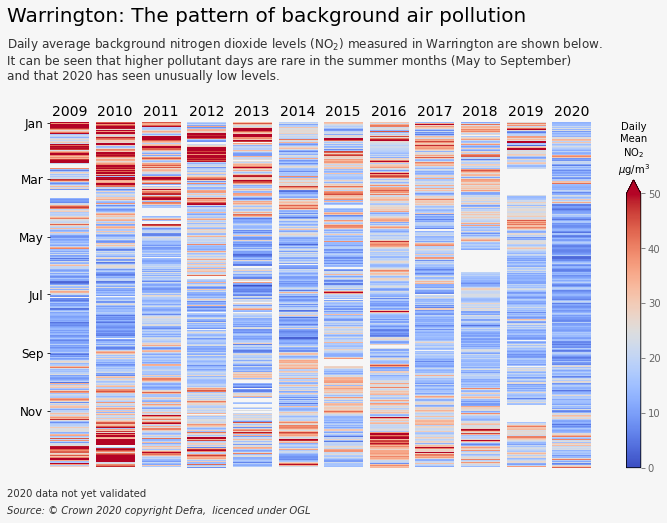

In [5]:
fig = dm_stripechart()
fig.text(.04,.9,'Daily average background nitrogen dioxide levels (NO$_2$) measured in Warrington are shown below.\n'+
        'It can be seen that higher pollutant days are rare in the summer months (May to September)\n' +
         'and that 2020 has seen unusually low levels.', fontdict=h2)
fig.text(.04,.1,'2020 data not yet validated', fontdict=h3)
plt.savefig("vis/F11_WAR_NO2_daily_means.png") 
plt.show()

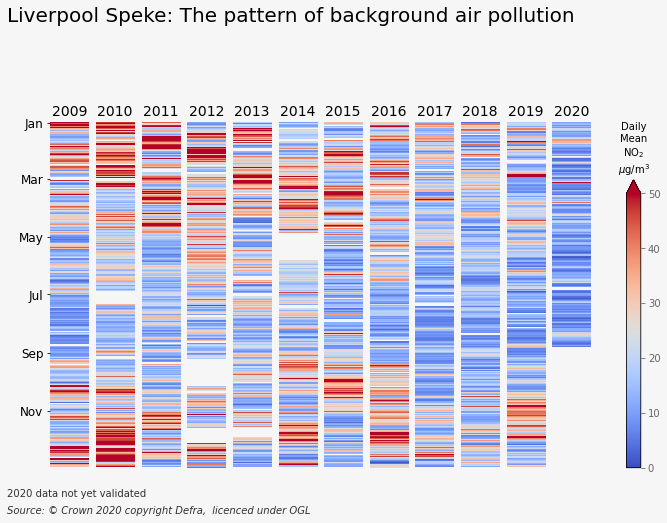

In [7]:
fig = dm_stripechart(site = 'Liverpool Speke')
fig.text(.04,.1,'2020 data not yet validated', fontdict=h3)
plt.show()

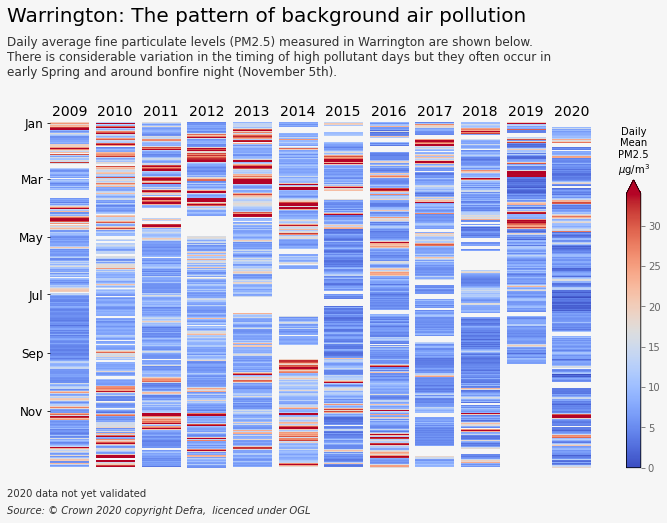

In [8]:
fig = dm_stripechart(pm25dat,pol='PM2.5',vmin=0,vmax=34 )
fig.text(.04,.9,'Daily average fine particulate levels (PM2.5) measured in Warrington are shown below.\n'+
        'There is considerable variation in the timing of high pollutant days but they often occur in\n' +
         'early Spring and around bonfire night (November 5th).', fontdict=h2)
fig.text(.04,.1,'2020 data not yet validated', fontdict=h3)
#plt.savefig("vis/F12_WAR_PM25_daily_means.png") 
plt.show()

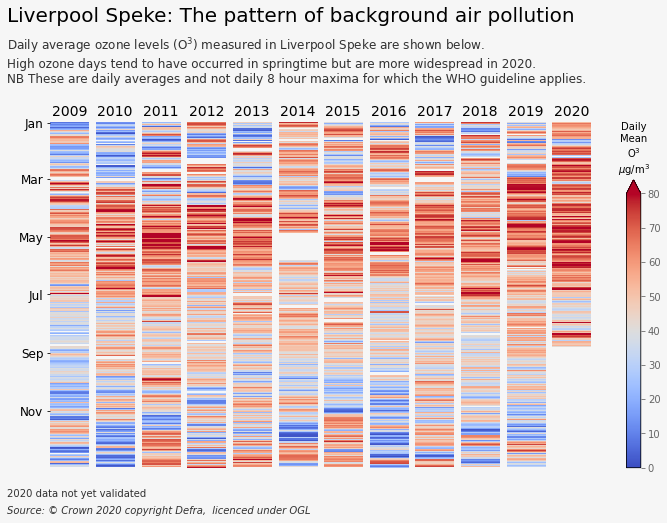

In [9]:
fig = dm_stripechart(o3dat, pol ='O$^3$',site='Liverpool Speke', vmin=0,vmax=80 )
fig.text(.04,.9,'Daily average ozone levels (O$^3$) measured in Liverpool Speke are shown below.\n'+
        'High ozone days tend to have occurred in springtime but are more widespread in 2020.\n' +
         'NB These are daily averages and not daily 8 hour maxima for which the WHO guideline applies.', fontdict=h2)
fig.text(.04,.1,'2020 data not yet validated', fontdict=h3) 
plt.show()

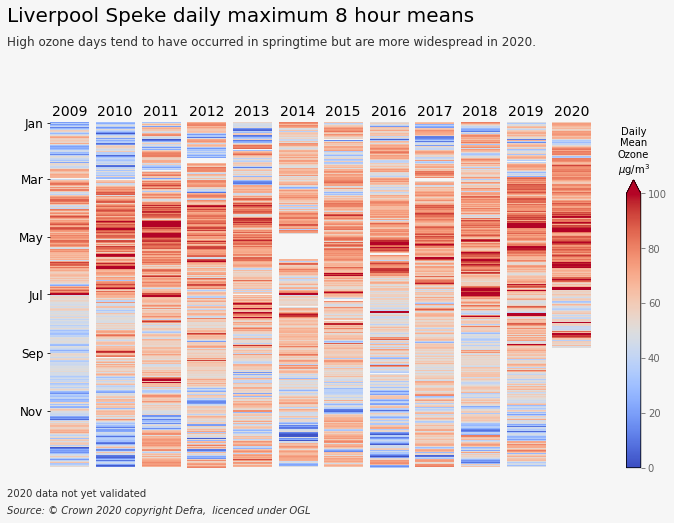

In [11]:
# Uk objective : ozone max daily 8 hr mean not to exceed 100 more than 10 times a year.
# Use at least 6 measurements per 8 hour period
h8m = o3dat.rolling('8H',min_periods=6).mean()  
# daily max 8 hr mean
dmh8m = h8m.resample('D').max()
site = 'Liverpool Speke'
pol = 'Ozone' 
vmin=0; vmax=100 
years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'] 

poldf = pd.DataFrame({'pol': dmh8m[site]}) 
#vmax = poldf.quantile(.97) 
    
fig,axs = plt.subplots(1,len(years),sharey=True, figsize=(10,8) 
                       , subplot_kw=dict(frameon=False, ylim=(365,0)))
fig.subplots_adjust(.1,.15,.85,.75)
cax = fig.add_axes([.9,.15,.02,.5])
for ix, year in enumerate(years):
    dat = poldf.loc[year,'pol'].values.reshape((-1,1))
    axs[ix].set_title(year, fontsize=14)  
    axs[ix].tick_params(axis='both', which='both', labelbottom=False)
    img = axs[ix].imshow(dat, aspect='auto', vmin=vmin, vmax=vmax, 
                         cmap='coolwarm', interpolation='nearest')
axs[0].tick_params(axis='both', which='both', labelleft=True, left=True
                           , labelsize=12, colors='k')
axs[0].set_yticks([1,60,121,182,244, 305])
axs[0].set_yticklabels(['Jan','Mar','May','Jul','Sep','Nov'])
fig.colorbar(img, cax=cax, extend='max')
cax.set_title('Daily\nMean\n'+pol+'\n$\mu$g/m$^3$',fontsize=10)
fig.text(.04,.95,site + ' daily maximum 8 hour means',fontdict=h1)
fig.text(.04,.07,"Source: © Crown 2020 copyright Defra,  licenced under OGL", fontdict=h4)
fig.text(.04,.9, 'High ozone days tend to have occurred in springtime but are more widespread in 2020.\n', fontdict=h2)
fig.text(.04,.1,'2020 data not yet validated', fontdict=h3)
plt.show()


# 2. 2020 compared with recent years

To see better how the latest data compared with recent years, the range of the previous 10 years of measurements were shown with the latest year superimposed.

In [12]:
def comparison_plot(df=no2dat, site='Warrington', pol='NO$_2$',
                    title=' background air pollutants in 2020 : '):
# plot smoothed time series for a year superimposed on range for previous five years
    groups = df.resample('W')
    wm = groups.mean()[groups.count()>140] # weekly means
    rm = wm.rolling(3, center=False, min_periods=2).mean() #rolling mean
    poldf = pd.DataFrame({'pol': rm[site]}) 
    x = poldf.loc['2020'].index.values
    y = poldf.loc['2020', 'pol'].values
    
    cf = poldf.loc['2010':'2014']
    #weekly_grp = cf.groupby([cf.index.week])
    weekly_grp = cf.groupby([cf.index.isocalendar().week])
    y1 = weekly_grp.pol.min()[:len(x)].values
    y2 = weekly_grp.pol.max()[:len(x)].values
    
    cf = poldf.loc['2015':'2019']
    weekly_grp = cf.groupby([cf.index.isocalendar().week])
    y3 = weekly_grp.pol.min()[:len(x)].values
    y4 = weekly_grp.pol.max()[:len(x)].values
    
    fig, ax = plt.subplots(figsize=(10,8), subplot_kw=dict(frameon=False))
    fig.subplots_adjust(.05,.15,.95,.75)
    ax.plot(x,y, lw=3)
    ax.set_title(pol+' $\mu$g/m$^3$',loc='left',fontsize=14)
    ax.fill_between(x,y1,y2, color='#dddddd')
    ax.fill_between(x,y3,y4, color='#bbbbbb')

    patch1 = mpatches.Patch(color='#dddddd', label='range 2010:2014')
    patch2 = mpatches.Patch(color='#bbbbbb', label='range 2015:2019')
    ax.legend(handles=[patch1, patch2])
    
    # format the ticks
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.SU))
    ax.tick_params(axis='x', which='both', bottom=True)
    ax.axvline(dt.datetime(2020,3,23),ls='--', lw=2,color='r')
    ax.annotate('UK lockdown',xy=(dt.datetime(2020,3,23), 3), xycoords='data',fontsize=12,
            xytext=(30, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
    fig.text(.04,.95,site +title + pol,fontdict=h1)
    fig.text(.04,.07,"Source: © Crown 2020 copyright Defra,  licenced under OGL", fontdict=h4) 
    return(fig,ax)

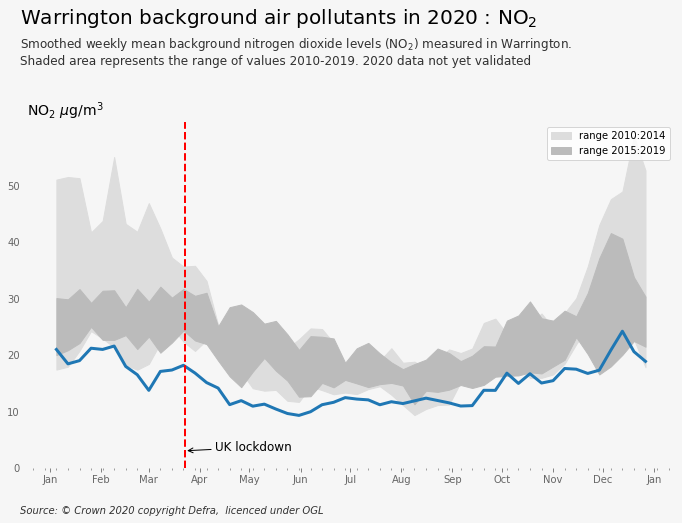

In [13]:
fig,ax = comparison_plot()
ax.set_yticks([0,10,20,30,40,50])

fig.text(.04,.9,'Smoothed weekly mean background nitrogen dioxide levels (NO$_2$) measured in Warrington.\n'+
        'Shaded area represents the range of values 2010-2019. 2020 data not yet validated', fontdict=h2)

plt.show()

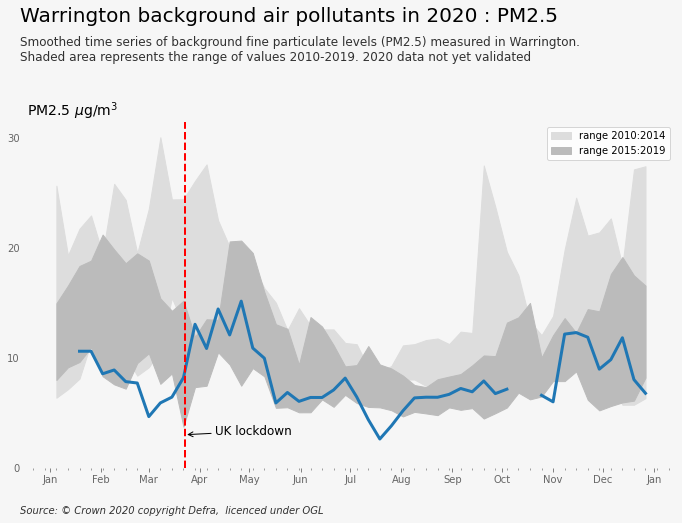

In [14]:
fig,ax = comparison_plot(df=pm25dat, pol='PM2.5')
ax.set_yticks([0,10,20,30])
fig.text(.04,.9,'Smoothed time series of background fine particulate levels (PM2.5) measured in Warrington.\n'+
        'Shaded area represents the range of values 2010-2019. 2020 data not yet validated', fontdict=h2)
plt.show()

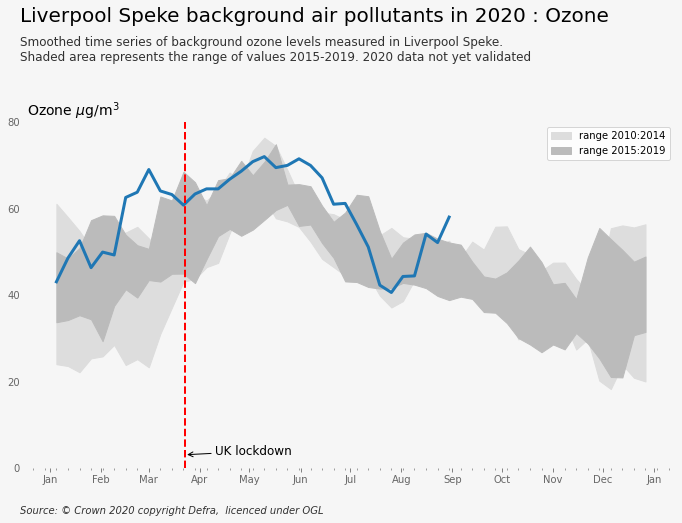

In [15]:
fig,ax = comparison_plot(df=o3dat, pol='Ozone', site='Liverpool Speke')
ax.set_yticks([0,20,40,60,80])
fig.text(.04,.9,'Smoothed time series of background ozone levels measured in Liverpool Speke.\n'+
        'Shaded area represents the range of values 2015-2019. 2020 data not yet validated', fontdict=h2)
plt.show()

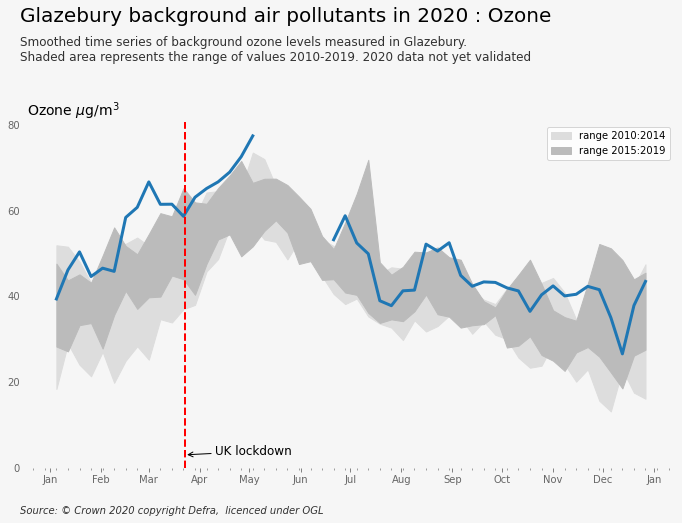

In [16]:
fig,ax = comparison_plot(df=o3dat, pol='Ozone', site='Glazebury')
ax.set_yticks([0,20,40,60,80])
fig.text(.04,.9,'Smoothed time series of background ozone levels measured in Glazebury.\n'+
        'Shaded area represents the range of values 2010-2019. 2020 data not yet validated', fontdict=h2)
plt.show()

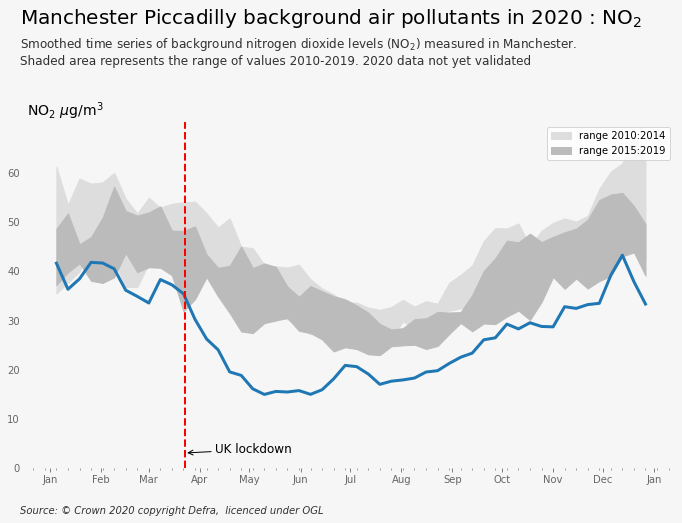

In [17]:
fig,ax = comparison_plot(site='Manchester Piccadilly')
ax.set_yticks([0,10,20,30,40,50,60])

fig.text(.04,.9,'Smoothed time series of background nitrogen dioxide levels (NO$_2$) measured in Manchester.\n'+
        'Shaded area represents the range of values 2010-2019. 2020 data not yet validated', fontdict=h2)
plt.savefig("vis/F12_MAN3_no2_20.png") 
plt.show()

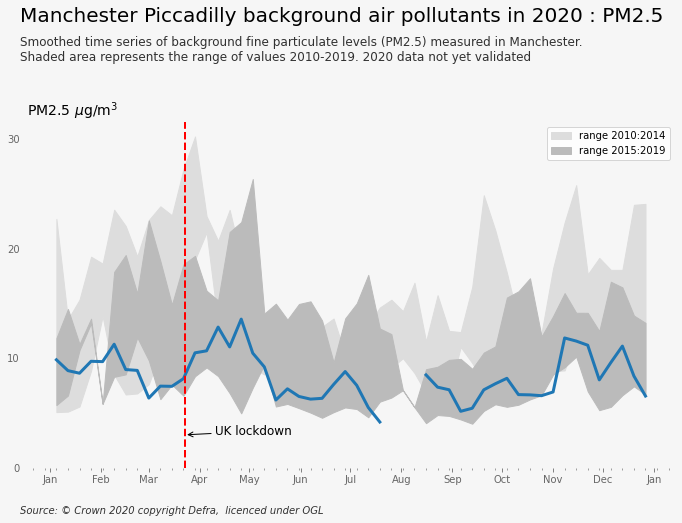

In [18]:
fig,ax = comparison_plot(df=pm25dat, pol='PM2.5', site='Manchester Piccadilly')
ax.set_yticks([0,10,20,30])
fig.text(.04,.9,'Smoothed time series of background fine particulate levels (PM2.5) measured in Manchester.\n'+
        'Shaded area represents the range of values 2010-2019. 2020 data not yet validated', fontdict=h2)
plt.show()

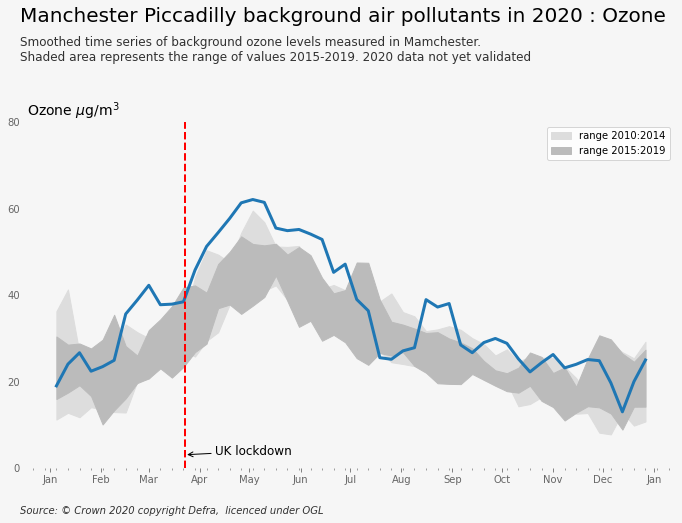

In [19]:
fig,ax = comparison_plot(df=o3dat, pol='Ozone', site='Manchester Piccadilly')
ax.set_yticks([0,20,40,60,80])
fig.text(.04,.9,'Smoothed time series of background ozone levels measured in Mamchester.\n'+
        'Shaded area represents the range of values 2015-2019. 2020 data not yet validated', fontdict=h2)
plt.show()